In [1]:
from env import Environment
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation, rc
from IPython.display import HTML

from dqn_agent import Agent
from collections import deque

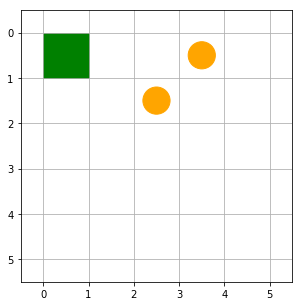

In [2]:
M = 5
N = 5
N_agents = 2
env = Environment(M, N, N_agents)
fig, ax = plt.subplots(1, 1, figsize=[5,5])
env.render(fig, ax)

In [3]:
all([False, False])

False

Episode 100	Average Score: -28.38
Episode 200	Average Score: -4.353


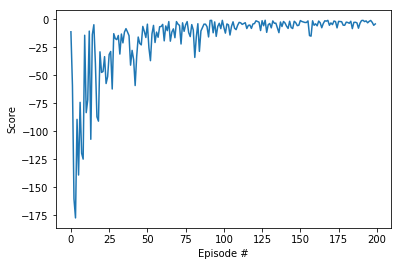

In [70]:
def dqn(n_episodes=200, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env = Environment(M, N, N_agents)
        states = [env.state(i_ag) for i_ag in range(len(agents))]
        dones = [False] * N_agents
        score = 0
        for t in range(max_t):
            for i_ag, agent in enumerate(agents):
                if not dones[i_ag]:
                    action = agent.act(states[i_ag], eps)
                    next_state, reward, dones[i_ag] = env.agent_action(action, i_ag)
                    agent.step(states[i_ag], action, reward, next_state, dones[i_ag])
                    states[i_ag] = next_state
                    score += reward
            if all(dones):
                break
            
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=200.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    return scores

# agent_1 = Agent(state_size=3, action_size=5, seed=0)
# agent_2 = Agent(state_size=3, action_size=5, seed=0)

# agents = [agent_1, agent_2]

scores = dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

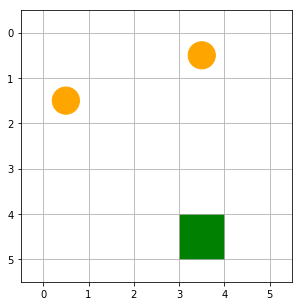

In [112]:
np.random.seed(1)
env = Environment(M, N, N_agents)
fig, ax = plt.subplots(1, 1, figsize=[5, 5])
env.render(fig, ax)

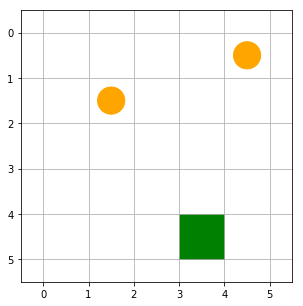

In [109]:
for i, agent in enumerate(agents):
    action = agent.act(env.state(i)) # Greedy action
    env.agent_action(action, i)
    env.render(fig, ax)
    
fig, ax = plt.subplots(1, 1, figsize=[5, 5])
env.render(fig, ax)

In [113]:
def simulate(i):
    for i_ag, agent in enumerate(agents):
        action = agent.act(env.state(i_ag)) # Greedy action
        env.agent_action(action, i_ag)
    ax.clear()
    env.render(fig, ax)
    return(ax,)

anim = animation.FuncAnimation(fig, simulate, init_func=env.render(fig, ax),
                               frames=10, interval=200, 
                               blit=False)


HTML(anim.to_jshtml())
